# 1. Needed Imports

In [1]:
import matplotlib.pyplot as plt # used to show image prediction to users
import numpy as np # used for numerical operations
from sklearn.datasets import fetch_lfw_people # used to load the dataset
from sklearn.linear_model import LogisticRegression # used to create the model
from sklearn.model_selection import train_test_split # used to split the dataset
from sklearn.metrics import accuracy_score # used to evaluate the model

# 2. Import dataset

In [2]:
dataset = fetch_lfw_people() #get dataset from sklearn - this one has faces of famous people
X = dataset.images # let X be the images of the people
y = dataset.target # let y be the numeric value associated with the image (which person it is)

# 3. Refine dataset for project example

### some of the data only have 1 sample per class, whereas some have 100s. Using this uneven set of data can skew model predictions.

In [3]:
class_samples = np.bincount(y) # count number of samples per class (number of images per person)
classes_over_100_samples = np.where(class_samples >= 100)[0] # filter for classes with more than 100 samples (more samples will make for better training)

mask = np.isin(y, classes_over_100_samples) # create a mask to filter out classes with less than 100 samples
X = X[mask] # get the classes with more than 100 samples
y = y[mask] # get the labels for the classes with more than 100 samples
selected_names = dataset.target_names[classes_over_100_samples] # get the mapping of numeric labels to names

label_map = {old_label: new_label for new_label, old_label in enumerate(classes_over_100_samples)} # Remap labels to be consecutive integers starting from 0 (works better when training the model)
y = np.array([label_map[label] for label in y]) # Apply the remapping to y

X_flat = X.reshape(len(X), -1) # flatten images for model input

# 4. Display dataset which will be used to train the model

In [4]:
print(f"Reduced dataset shape: {X.shape}")
print(f"Total number of samples: {len(X)}")
print(f"Number of unique people (classes): {len(np.unique(y))}")
print("Samples per person:")
for i in range(len(selected_names)): #parse through each person
    n_samples = (y == i).sum() # count number of samples for that person
    print(f"{selected_names[i]}: {n_samples} images") # print the person's name and number of samples

Reduced dataset shape: (1140, 62, 47)
Total number of samples: 1140
Number of unique people (classes): 5
Samples per person:
Colin Powell: 236 images
Donald Rumsfeld: 121 images
George W Bush: 530 images
Gerhard Schroeder: 109 images
Tony Blair: 144 images


# 5. Set up train, test, and validation data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42) # split dataset into training and testing sets

# 6. Create the model and train the model on the train dataset

In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# 6. Use the model to predict on the test dataset. Calculate accuracy and loss to see if hyperparameters need fine tuning (max_iter)

In [7]:
y_pred = model.predict(X_test) # make predictions on the test set
accuracy = accuracy_score(y_test, y_pred) # calculate the accuracy of the model
print(f"Model accuracy:", accuracy) # print the accuracy

Model accuracy: 0.8289473684210527


# 7. Display the results by plotting

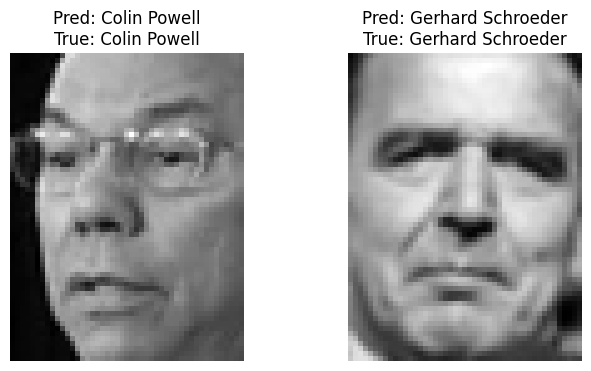

In [9]:
# Visualize some predictions
fig, axes = plt.subplots(1, 2, figsize=(8, 4)) # create a figure with 2 subplots
random_indices = np.random.randint(0, len(X_test), 2) # get 2 random indices from the test set

for idx, ax in enumerate(axes.flat): # iterate through the subplots
    i = random_indices[idx] # get the random index for current subplot
    ax.imshow(X_test[i].reshape(62, 47), cmap='gray')  # reshape to original size and display the image
    ax.set_title(f"Pred: {selected_names[y_pred[i]]}\nTrue: {selected_names[y_test[i]]}") # set the title to show predicted and true labels
    ax.axis('off') # turn off axis for cleaner look
    
plt.show() # display the plot